# Part II - (Prosper Loan Data Exploration)
## by (Melodie Ezeani)

## Investigation Overview

In this investigation, I wanted to look at some features that could influence loan status, and features that could best predict the loan amount.

For the presentation, I focus on just the influence of four key variables - lower credit score range, Borrower's rate, borrower's Income range, and Available bank card credit of the borrower, on my variables of interest and leave out most of the intermediate derivations.


## Dataset Overview

The data is a Loan dataset from Prosper. It contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')

#getting a subset of the data
variables_of_interest = ['Term', 'LoanStatus', 'BorrowerRate', 'EmploymentStatus', 'CreditScoreRangeUpper', 
                         'CreditScoreRangeLower', 'CurrentDelinquencies', 'AmountDelinquent', 'IncomeRange', 'BorrowerState', 
                         'Occupation', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'TotalCreditLinespast7years',
                         'DelinquenciesLast7Years', 'AvailableBankcardCredit', 'IncomeVerifiable', 'TotalProsperLoans',
                         'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
                         'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding',
                         'LoanOriginalAmount']

loan_subset = loan_data[variables_of_interest]
loan_subset.head()

#copy dataset
clean_data = loan_subset.copy()

In [3]:
print('Initial data shape: {}'.format(clean_data.shape))

#DATA CLEANING ON DATASET
clean_data = clean_data.drop_duplicates() #drop duplicated rows

#drop columns due to large amount of missing values
clean_data.drop(columns=['TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 
                          'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 
                          'ProsperPrincipalOutstanding'], inplace=True)

#Drop missing values in other columns
clean_data.dropna(inplace=True)

print('Final data shape: {}'.format(clean_data.shape))

Initial data shape: (113937, 25)
Final data shape: (102415, 18)


## Distribution of Loan Amount

Loan Amount in the dataset take on a very large range of values, from about \\$1000 at the lowest, to about \$35,000 at the highest. Plotted on a logarithmic scale, the distribution of the Loan Amount takes on choppy normal shape. You can see majority of the values fall between \\$4500 and \$15000.

In [4]:
#creating a function for our histogram plot
def histplot(data, x, bins, xlabel, ylabel, title, figsize:list=[8, 5]):
    """
    This function plots a histogram of the data it is given
    Arguments:
        data: Data frame
        x: variable of interest
        bins: specifies the bins to be used 
        xlabel: label to be used on the x axis
        ylabel: label to be used on the y axis
        title: title of the plot
        figsize: tuple/list specifying the size of the figure       
    """
    plt.figure(figsize=figsize)
    plt.hist(data=data, x=x, bins=bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

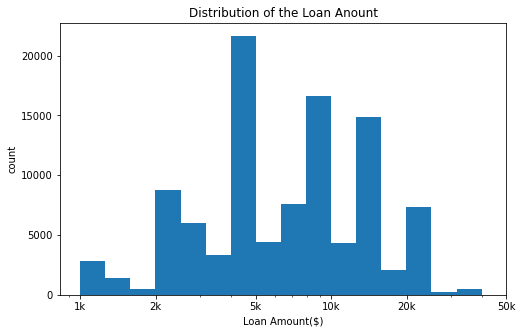

In [5]:
bins = 10 ** np.arange(3.0, np.log10(clean_data.LoanOriginalAmount.max())+0.1, 0.1)

histplot (clean_data, 'LoanOriginalAmount', bins, 'Loan Amount($)', 'count', 'Distribution of the Loan Anount')
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k', '5k', '10k', '20k', '50k']);

## Distribution of Loan Status

The Loan status shows the status of a loan. The data dictionary of this dataset indicates that the categories in the loan status column is supposed to follow an inherent ordering, which is what is depicted in it's distribution in the next slide.

The chart shows that most of the loans are still in progress, and a high percentage of borrowers pay off their loans. Charged off loans plus default loans don't even make up to half of the completed loans. Most of the data points also fall in the just 4 categories: Chargedoff, Completed, Current, and Defaulted.

In [6]:
#creating a function for our bar plot
def barchart(data, xlabel, ylabel, title, color, x=None, y=None, figsize:list=[8, 5]):
    """
    This function plots a barchart of the data it is given
    Arguments:
        data: Data frame
        x: variable of interest plotted horizontally
        y: variable of interest plotted vertically
        xlabel: label to be used on the x axis
        ylabel: label to be used on the y axis
        title: title of the plot
        color: color to be applied on the bars 
        figsize: tuple/list specifying the size of the figure
    """
    plt.figure(figsize=figsize)
    sb.countplot(data=data, x=x, y=y, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);

In [7]:
#Ordering the Loan Status column
ls_classes = ['Cancelled', 'Chargedoff', 'Completed', 'Current', 'Defaulted',  'FinalPaymentInProgress', 'Past Due (1-15 days)',
              'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)',
              'Past Due (>120 days)']
classes = pd.api.types.CategoricalDtype(ordered=True, categories=ls_classes)
clean_data['LoanStatus'] = clean_data['LoanStatus'].astype(classes)

In [8]:
#Ordering the IncomeRange column
ir_classes = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not employed', 
              'Not displayed']
classes = pd.api.types.CategoricalDtype(ordered=True, categories=ir_classes)
clean_data['IncomeRange'] = clean_data['IncomeRange'].astype(classes)

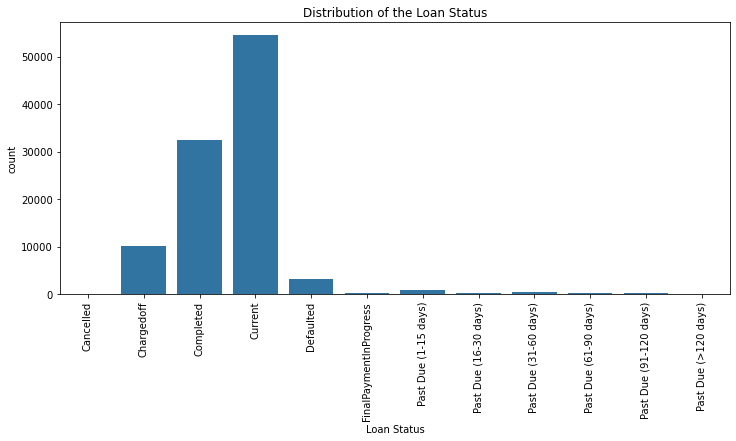

In [9]:
base_color = sb.color_palette()[0]

barchart(clean_data, 'Loan Status', 'count', 'Distribution of the Loan Status', base_color, figsize=[12, 5], x='LoanStatus')
plt.xticks(rotation=90);

## Loan Amount vs. Lower Credit Score Range

Plotting Loan Amount against Lower Credit Score Range produces an approximately linear relationship. Where we see that as loan amount increases so does Lower Credit Score Range.

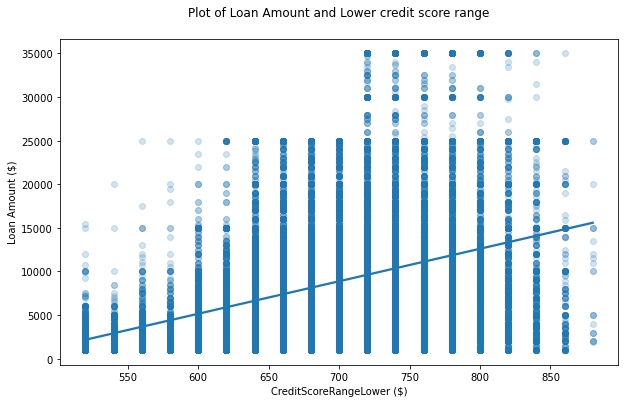

In [10]:
plt.figure(figsize=(10, 6))

sb.regplot(data=clean_data, x='CreditScoreRangeLower', y='LoanOriginalAmount', y_jitter = 0.04, fit_reg = True,
scatter_kws = {'alpha' : 1/5})
plt.ylabel('Loan Amount ($)')
plt.xlabel('CreditScoreRangeLower ($)')
plt.title('Plot of Loan Amount and Lower credit score range', y=1.05);

## Loan Amount against Some categoric columns

In this section we visualize the relationship between some categorical columns and Loan Amount, the visualization show some interesting insights:
- We see there are a lot customers in the 12 months term getting loan amount within the range 0-5000. Also, As loan term increases, loan amount increases, which isn't really a surpise.
- There doesn't seem to be much of a relationship between loan status and loan amount, which I find interesting.
- More money is given to borrowers who are employed and self employed. However, most of the customers seem to fall into other and not employed categories.
- As income range increases so does loan amount, this is also expected.

In [11]:
# creating a function for our violin grid.
def violingrid(data, x:list, y, nrows, ncols, figsize=[25, 15], suptitle=None):
    """
    Plots a grid of violinplots showing distribution between a numerical variable and a set of categorical variables.
    No of rows and cols should make up len of the numerical variables list.
    Arguments:
        data: data frame to use
        x: list of categorical variables
        y: numerical variable
        nrows: no of rows to be plotted
        ncols: no of columns to be plotted
        figsize: size of the figure
        suptitle: Generate a title for all plots
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()

    default_color = sb.color_palette()[0]
    index = 0
    r = ncols*nrows
    for i in range(r):
        g = sb.violinplot(data=data, x=x[index], y=y, color=default_color, ax=axes[i])
        g.tick_params(axis='x', labelrotation = 15);
        index += 1
    fig.tight_layout(h_pad=8)   
    fig.suptitle(suptitle, y=1.05, fontsize=18)

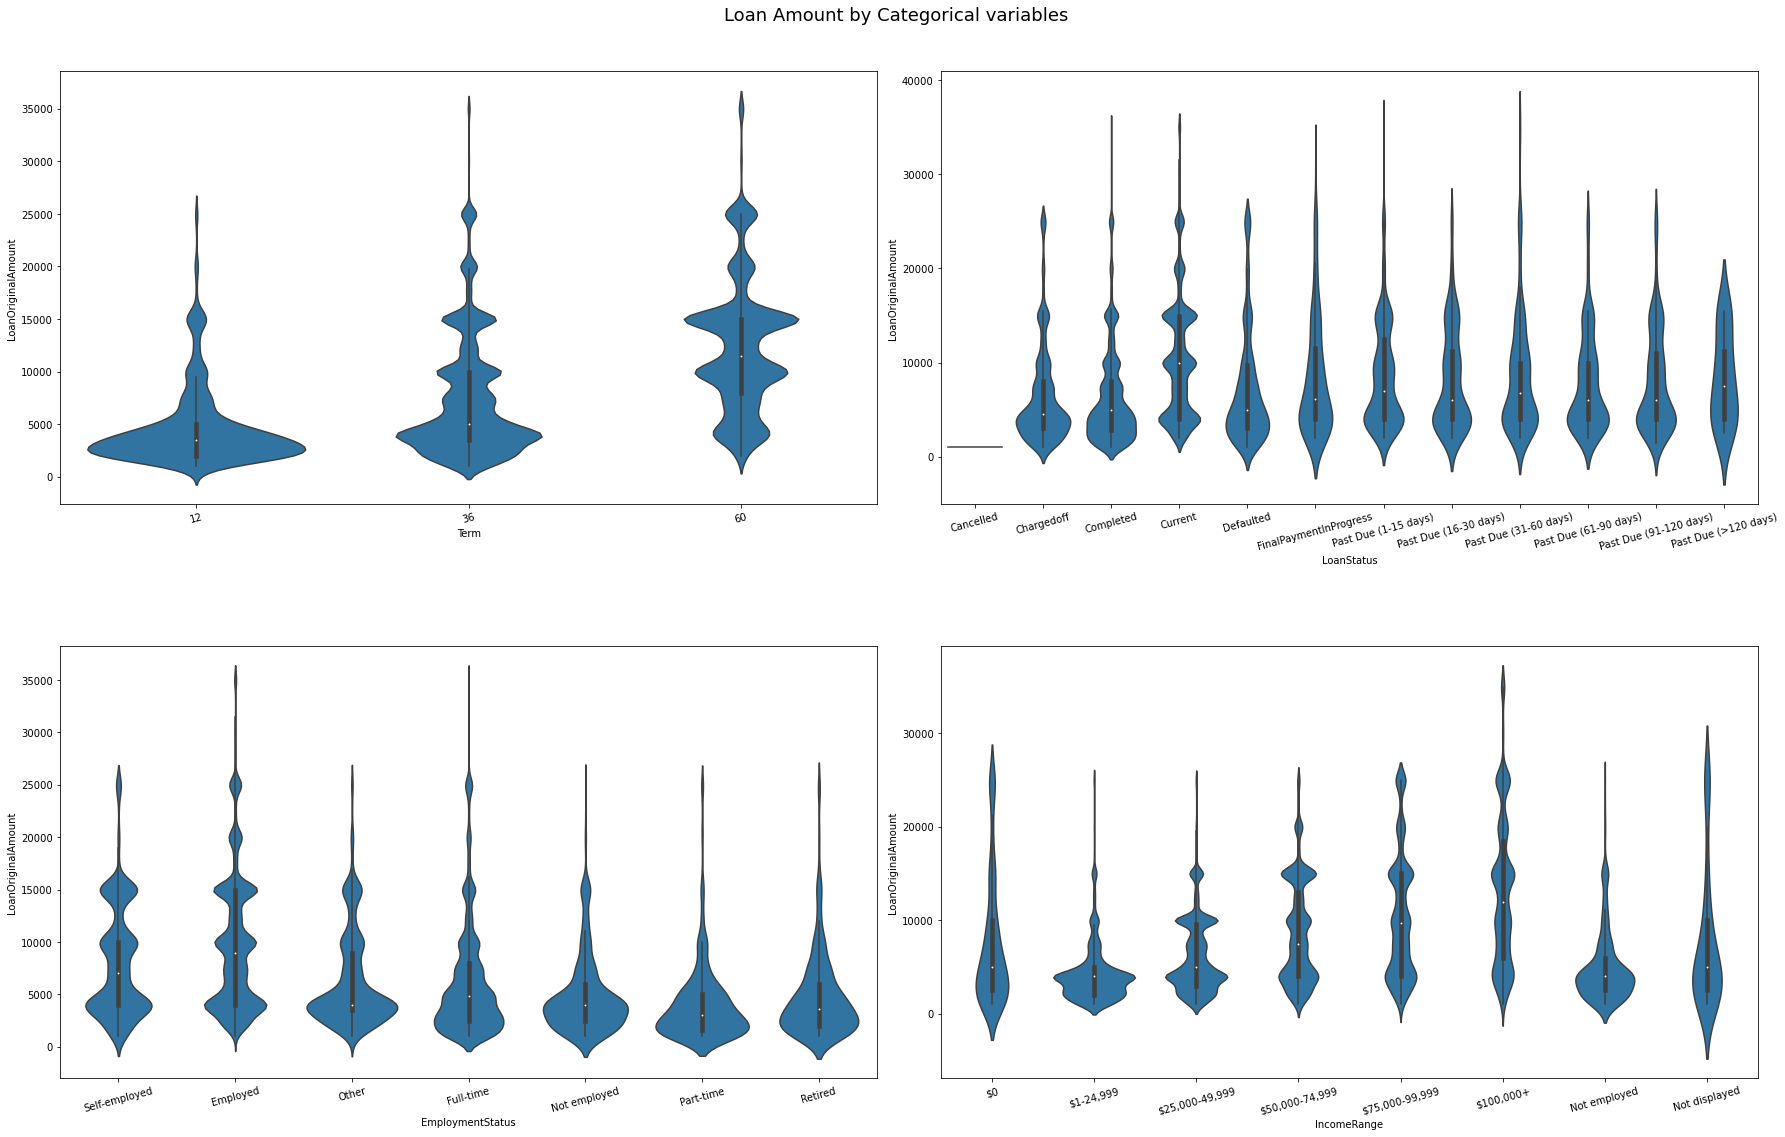

In [12]:
#viewing the relationship between our categorical variables and Loan Amount
categoric_vars = ['Term', 'LoanStatus', 'EmploymentStatus', 'IncomeRange']
violingrid(clean_data, categoric_vars, 'LoanOriginalAmount', nrows=2, ncols=2, suptitle='Loan Amount by Categorical variables');

## Loan Status against Some numeric columns
In this section we visualize the relationship between some numerical columns and Loan Status, here are the insights gotten from the plot:

- Loans that have been completed or currently on-going, have mean credit score lower range of about 700, while loans that have been charged off or defaulted have the lowest credit score lower range.
- Loans that have been completed or currently on-going have the lowest borrower rate.
- Loans with the lowest AvailableBankcardCredit are those that have been charged off and defaulted, followed by delinquent loans.


In [13]:
# creating a function for our box grid.
def boxgrid(data, x, y:list, nrows, ncols, figsize=[25, 15], suptitle=None):
    """
    Plots a grid of boxplots showing distribution between a categorical variable and a set of numerical variables.
    No of rows and cols should make up len of the numerical variables list.
    Arguments:
        data: data frame to use
        x: categorical variable
        y: list of numerical variables
        nrows: no of rows to be plotted
        ncols: no of columns to be plotted
        figsize: size of the figure
        suptitle: Generate a title for all plots
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    fig.tight_layout(h_pad=5)
    axes = axes.flatten()

    default_color = sb.color_palette()[0]
    index = 0
    r = ncols*nrows
    for i in range(r):
        g = sb.boxplot(data=data, x=x, y=y[index], color=default_color, ax=axes[i])
        g.tick_params(axis='x', labelrotation = 15);
        index += 1
    fig.tight_layout(h_pad=8)   
    fig.suptitle(suptitle, y=1.05, fontsize=18)

In [14]:
no_outliers = clean_data.copy()

# creating a function that removes outliers
def remove_outliers(data, x):
    """ This removes outliers in a column in a dataframe"""
    Q1 = np.percentile(data[x], 25) 
    Q3 = np.percentile(data[x], 75)
    IQR = Q3 - Q1

    upper = Q3+1.5*IQR  # Upper bound
    lower = Q1-1.5*IQR  # Lower bound

    print("Old Shape: ", data.shape)
    no_outliers = data[(data[x] >= lower) & (data[x] <= upper)]
    print("New Shape: ", no_outliers.shape)
    return no_outliers

### removing outliers in our data from AvailableBankcardCredit
no_outliers = remove_outliers(no_outliers, 'AvailableBankcardCredit')

Old Shape:  (102415, 18)
New Shape:  (92990, 18)


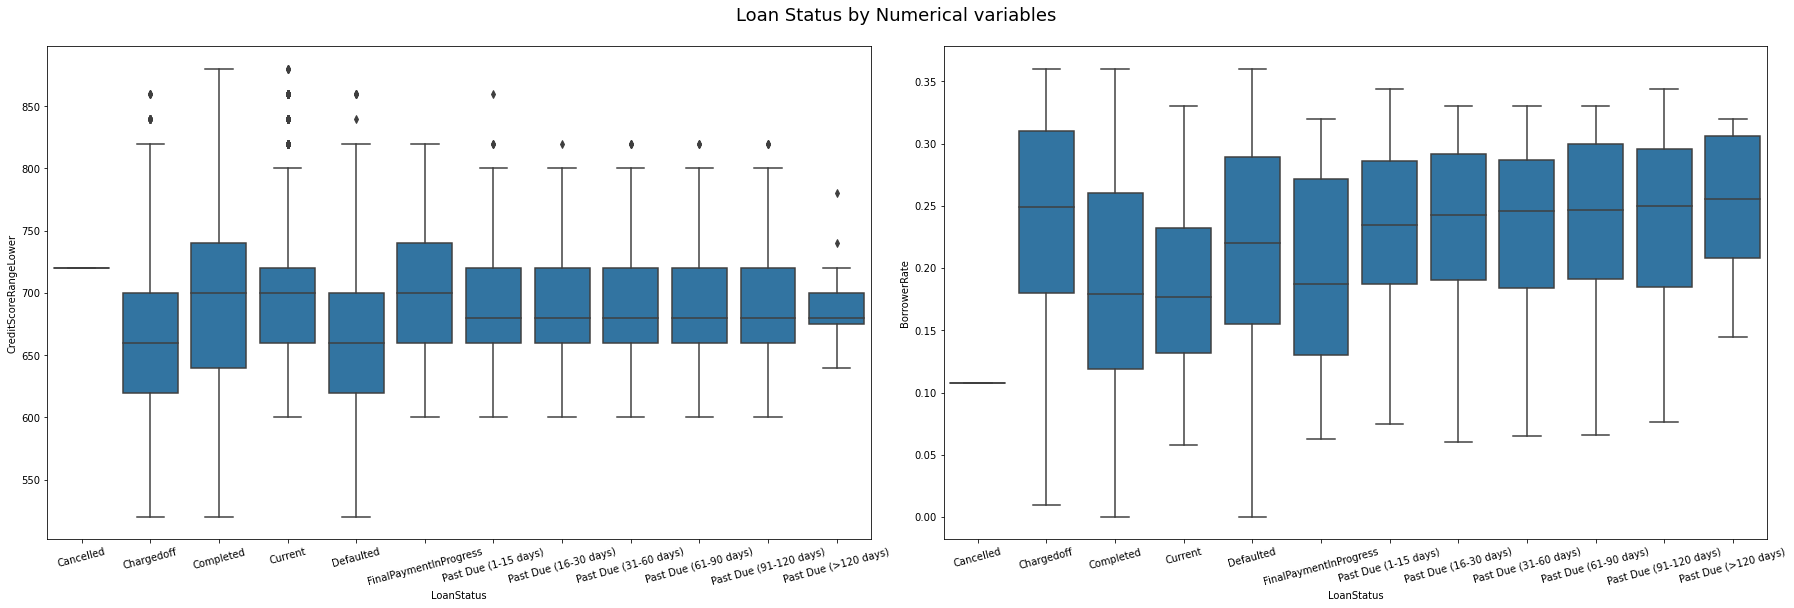

In [15]:
num_var = ['CreditScoreRangeLower', 'BorrowerRate']

boxgrid(clean_data, 'LoanStatus', num_var, nrows=1, ncols=2, figsize=(25, 8), suptitle='Loan Status by Numerical variables')


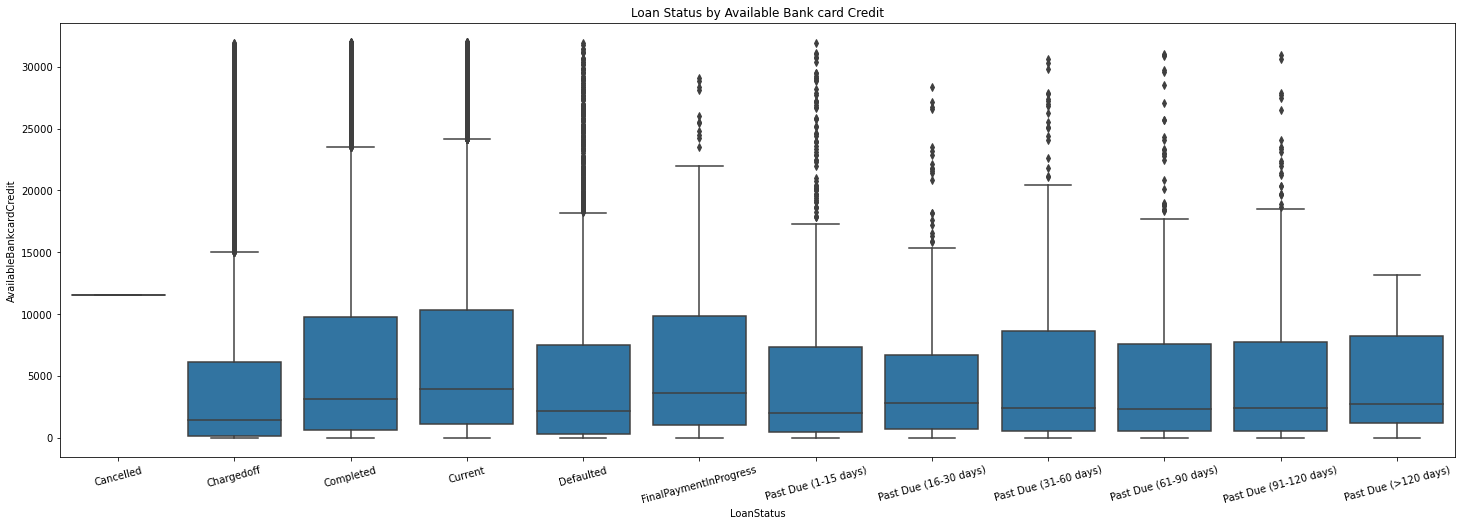

In [16]:
plt.figure(figsize=(25,8))
sb.boxplot(data=no_outliers, x='LoanStatus', y='AvailableBankcardCredit', color=sb.color_palette()[0])
plt.xticks(rotation=15)
plt.title('Loan Status by Available Bank card Credit');

## Loan Amount by Lower Credit Score Range over levels of Loan Status

This plot shows a relationship that exists between the Loan Amount, CreditScoreRangeLower, and Loan status variables. There's a lot of overlapping between current and defaulted loans but the general trend is also clear. We can see that as loan amount increases, credit score increases, and in that relationship situated at the highest points of loan amount and creditscorerangelower are most of loans that are completed.

We can also see a number of chargedoff loans occur where loan amount is relatively high and creditscorerangelower is relativelt low.

In [17]:
#creating a function for plotting two numerical varaibles with Loan Status
def multi_scatterplot(data, cat_var, x, y, xl, yl):
    """This function allows for plotting two numerical varaibles with our Loan Status"""
    ttype_markers = [['Chargedoff', 'o'], ['Current', 's'], ['Defaulted', 'X'], ['Completed', '*']]
    
    plt.figure(figsize=(10, 6))
    for ttype, marker in ttype_markers:
        plot_data = sample[sample['LoanStatus'] == ttype] #using our sample dataset, where Loan status has been filtered
        plt.scatter(data=plot_data, x=x , y=y, marker=marker)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.legend(['Chargedoff', 'Completed', 'Current', 'Defaulted'], title='Loan Status')
    plt.title('Plot of ' + str(yl) + ' against ' + str(xl) + ' on levels of the ' + str(cat_var) + ' variable', y=1.05);

In [18]:
sample = clean_data.copy()
sample['LoanStatus'] = sample.LoanStatus.astype(str) #changing the dtype 
subset = ['Chargedoff', 'Completed', 'Current', 'Defaulted']

sample = sample[sample['LoanStatus'].isin(subset)].copy()

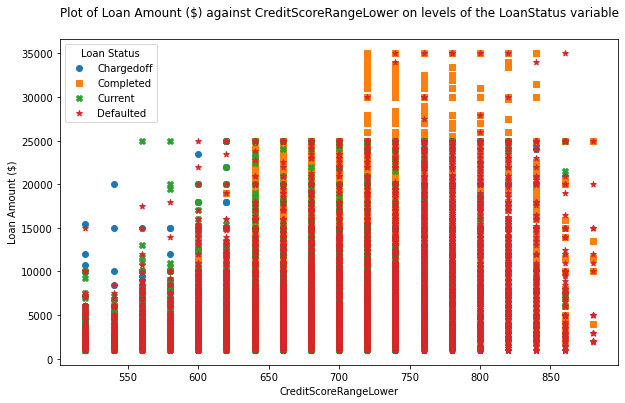

In [19]:
multi_scatterplot(sample, 'LoanStatus', x='CreditScoreRangeLower', y='LoanOriginalAmount', xl='CreditScoreRangeLower',
                  yl='Loan Amount ($)');

## Credit Score Lower Range and Borrower Rate over levels of Loan Status

To view this relationship, a faceted heatmap was used. In each of the faceted heat maps, you can see an interesting relationship between the three variables. The general trend is downward, more completed loans are located where the creditscorerangelower is high and the borrower rate is low, while more defaulted loans are located where the creditscorerangelower is relatively lower and the borrower rate is relatively higher.

In [20]:
#creating another function for plotting two numerical varaibles with Loan Status
def hist2dgrid(x, y, bins:list, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    plt.hist2d(x, y, bins=bins, cmap = palette, cmin = 0.5)

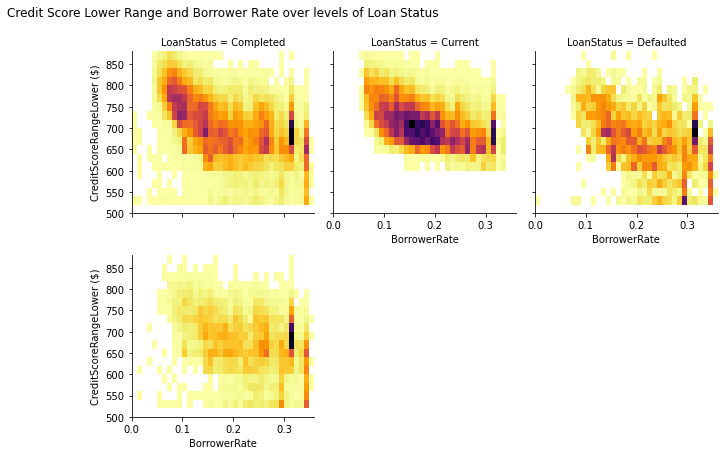

In [21]:
# create faceted heat maps on levels of the Loan status variable
bins_x = np.arange(0, sample.BorrowerRate.max()+0.01, 0.01) #borrowerrate
bins_y = np.arange(500, sample.CreditScoreRangeLower.max()+20, 20) #CreditScoreRangeLower

g = sb.FacetGrid(data = sample, col = 'LoanStatus', col_wrap = 3, height = 3);
g.map(hist2dgrid, 'BorrowerRate', 'CreditScoreRangeLower', bins=[bins_x, bins_y], color = 'inferno_r')
g.set_xlabels('BorrowerRate')
g.set_ylabels('CreditScoreRangeLower ($)')
plt.title('Credit Score Lower Range and Borrower Rate over levels of Loan Status', y=2.5, fontsize=12, va='top');

## Loan Amount against Income Range on levels of Loan Status

This plot shows an interesting relationship. We see here that borrowers who didn't have their income range displayed had the highest chargedoff rate, and also the borrowers who have income range of 0$ have a high chance of defaulting.

In [22]:
#creating a function for plotting two categorical variables(Loan Status included) with one numerical variable
def barplot(x, y, hue):
    """Creates a barplot for plotting two categorical variables(Loan Status included) 
    with one numerical variable
    """
    plt.figure(figsize=(13,6))
    ax = sb.barplot(data=sample, x=x, y=y, hue=hue)
    ax.legend(title='LoanStatus')
    plt.xticks(rotation=15)
    plt.title('Plot of ' + str(y) + ' against ' + str(x) + ' on levels of the ' + str(hue) + ' variable', y=1.05)
    plt.xticks(rotation=15);

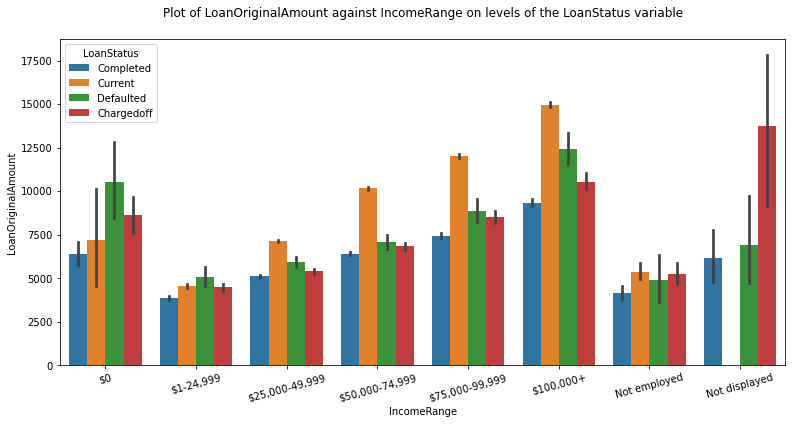

In [23]:
barplot(x='IncomeRange', y='LoanOriginalAmount', hue='LoanStatus')

## Available Bank Card Credit against Income Range on levels of Loan Status

This plot shows that most borrowers having income range of 0$, have a high default rate, also there's a general increase in income range as availablebankcardcredit increases.

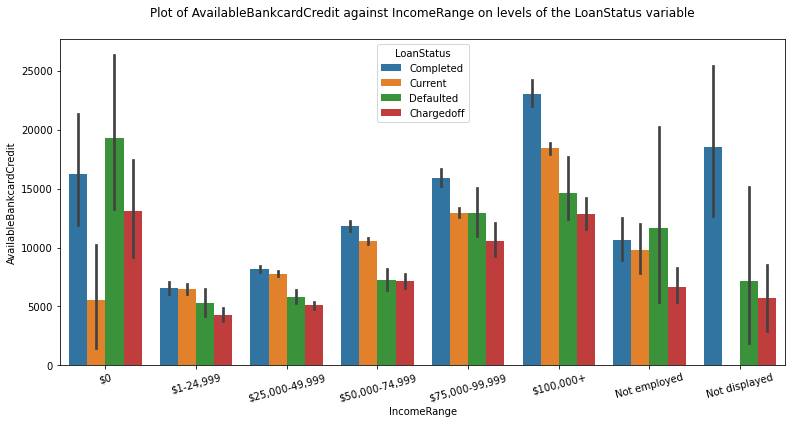

In [24]:
barplot(x='IncomeRange', y='AvailableBankcardCredit', hue='LoanStatus')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert ProsperLoans_Part2.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
